In [3]:
#normal imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

#Data Viz
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid') # white background for visulization

from pandas_datareader import DataReader #to read stock info from Yahoo finance or Google finance

from datetime import datetime # to set start date & end date for data

#from _future_ import division #no need to worry about float numbers - only for Python 2.x

In [6]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN'] #list of technology stocks - lets focus on tech stock

In [7]:
#setting up time frame for stock date
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)

In [8]:
#grab some finance data from Yahoo & set as DataFrame
for stock in tech_list:
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [14]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-09-28,225.839996,224.020004,224.789993,225.740005,22929400.0,222.290543
2018-10-01,229.419998,226.350006,227.949997,227.259995,23600800.0,223.787323
2018-10-02,230.000000,226.630005,227.250000,229.279999,24788200.0,225.776459
2018-10-03,233.470001,229.779999,230.050003,232.070007,28654800.0,228.523819
2018-10-04,232.350006,226.729996,230.779999,227.990005,32042000.0,224.506180


In [13]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-09-28 to 2019-09-27
Data columns (total 6 columns):
High         251 non-null float64
Low          251 non-null float64
Open         251 non-null float64
Close        251 non-null float64
Volume       251 non-null float64
Adj Close    251 non-null float64
dtypes: float64(6)
memory usage: 13.7 KB


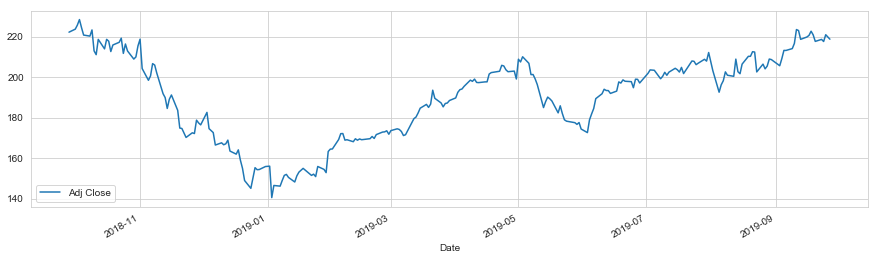

In [22]:
#Q1: What was the change in price of the stock over time?

AAPL['Adj Close'].plot(legend=True, figsize=(15,4))
# sns.lineplot(x=AAPL.index, y='Adj Close', data=AAPL)

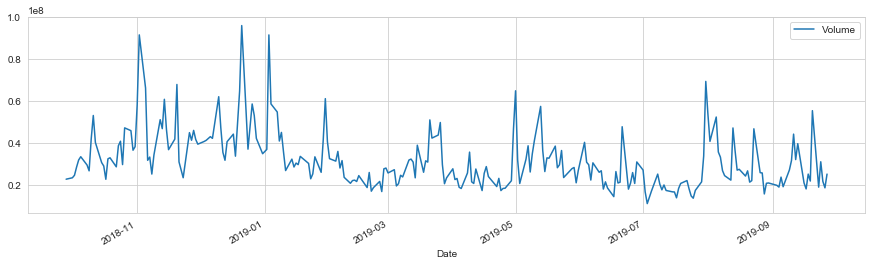

In [23]:
AAPL['Volume'].plot(legend=True, figsize=(15,4))

In [26]:
#Q3: What was the moving average of the various stocks?

# Calculate Moving Averages for 10,20,50 days into separate columns
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

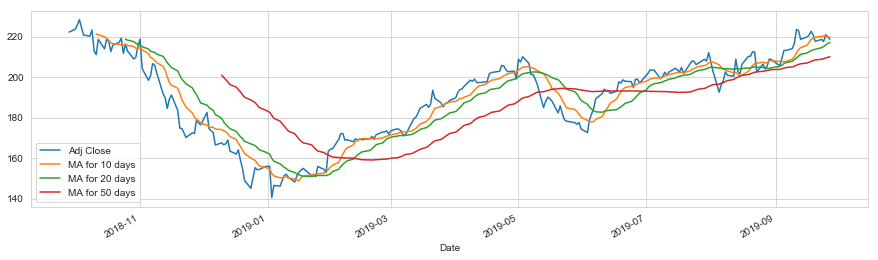

In [31]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(figsize=(15,4))

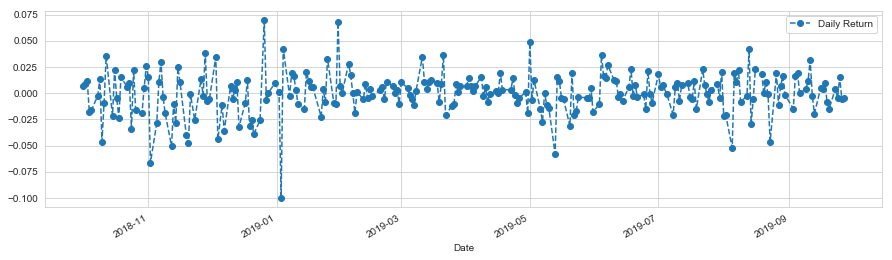

In [35]:
#Q2: What was the daily return of the stock on average?
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(15,4), legend=True, linestyle='--', marker='o')

C:\Users\parikshitas\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


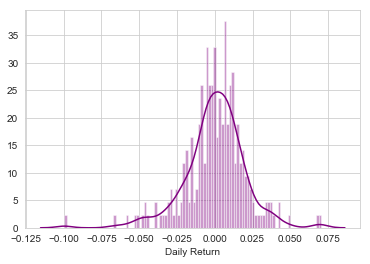

In [36]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

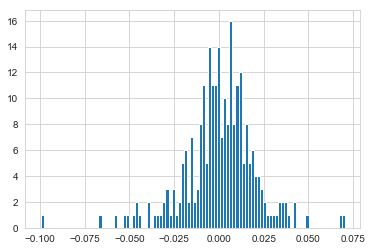

In [37]:
AAPL['Daily Return'].hist(bins=100)

In [39]:
#Q4:  What was the correlation between different stocks' daily returns?
# analyze returns of all stocks in tech_list
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close'] #get only Adj Close column

closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-09-28,222.290543,2003.000000,1193.469971,112.600616
2018-10-01,223.787323,2004.359985,1195.310059,113.821434
2018-10-02,225.776459,1971.310059,1200.109985,113.368553
2018-10-03,228.523819,1952.760010,1202.949951,113.388237
2018-10-04,224.506180,1909.420044,1168.189941,111.045067


In [40]:
tech_rets = closing_df.pct_change()

In [41]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-09-28,NaN,NaN,NaN,NaN
2018-10-01,0.006733,0.000679,0.001542,0.010842
2018-10-02,0.008889,-0.016489,0.004016,-0.003979
2018-10-03,0.012168,-0.009410,0.002366,0.000174
2018-10-04,-0.017581,-0.022194,-0.028896,-0.020665


C:\Users\parikshitas\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


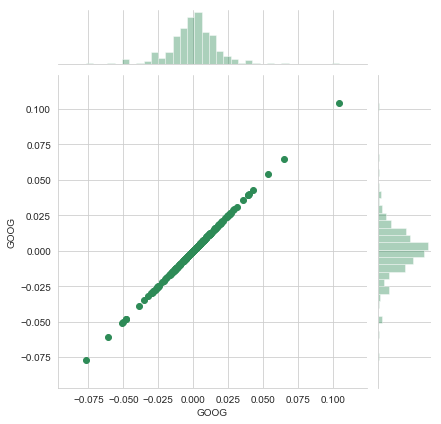

In [42]:
sns.jointplot('GOOG','GOOG',tech_rets, kind='scatter', color='seagreen')

C:\Users\parikshitas\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


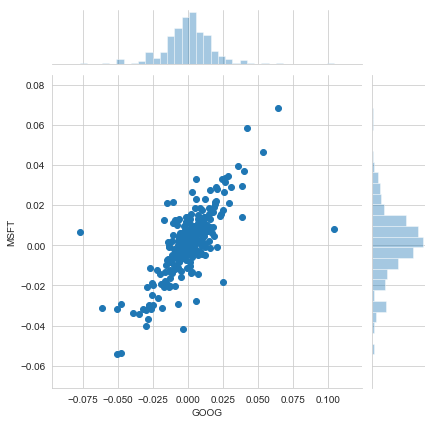

In [43]:
sns.jointplot('GOOG','MSFT',tech_rets)

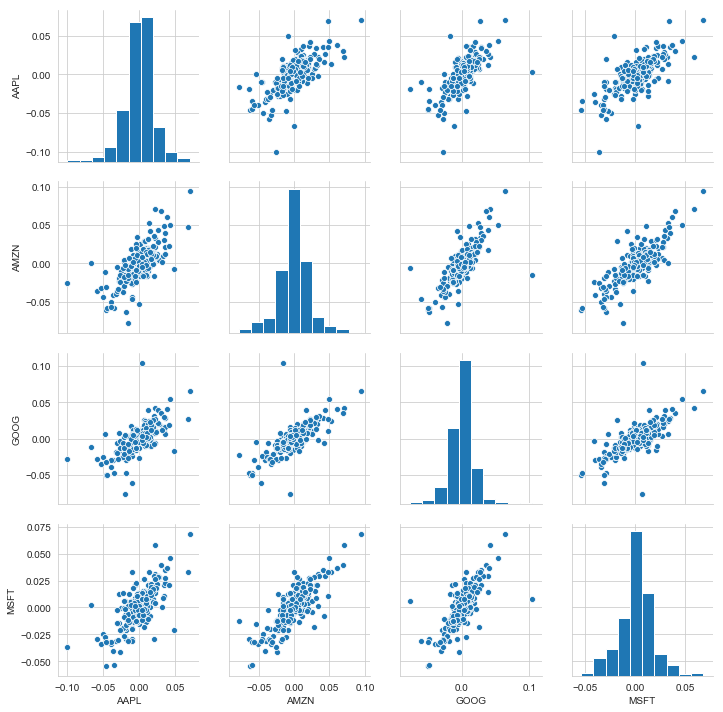

In [44]:
sns.pairplot(tech_rets.dropna())

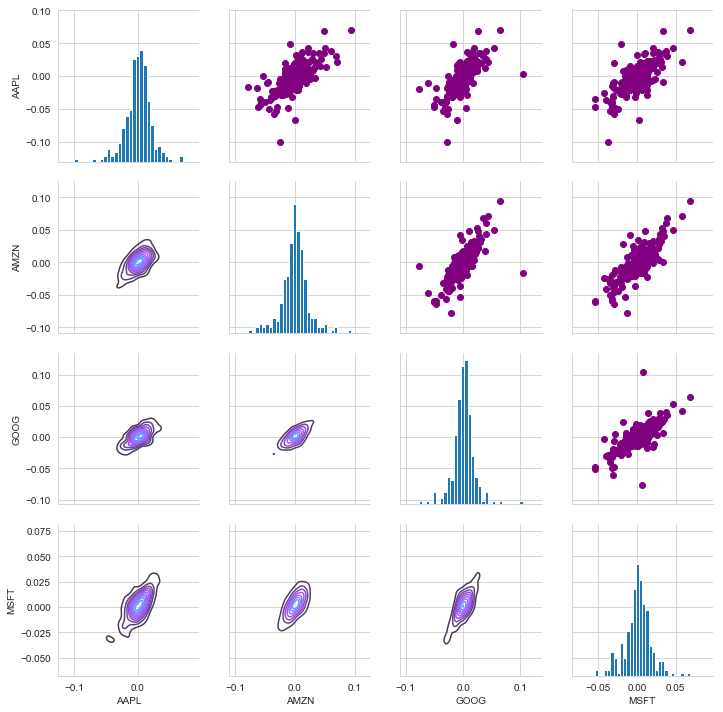

In [46]:
#Customize the PairGrid charts

returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

C:\Users\parikshitas\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


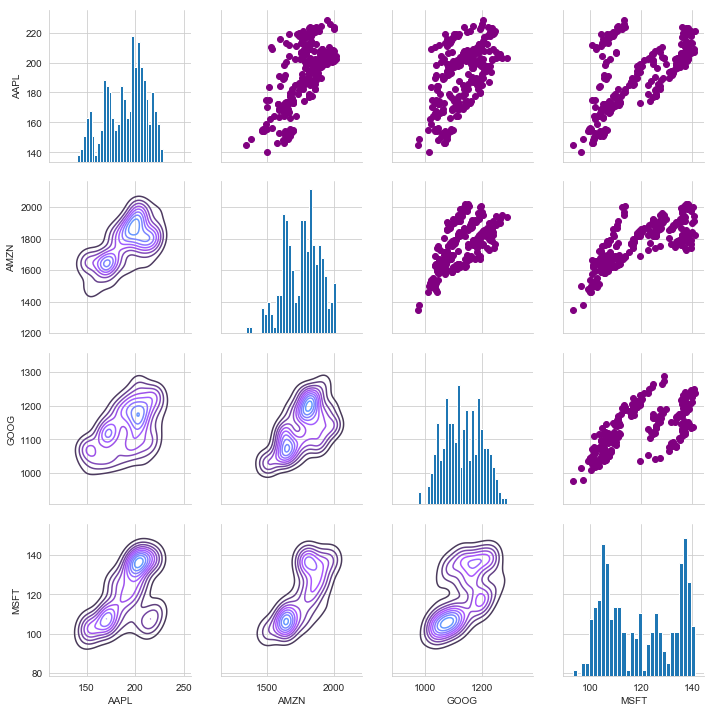

In [47]:
#Q5: What was the correlation between different stocks' closing prices?
returns_fig = sns.PairGrid(closing_df.dropna())

returns_fig.map_upper(plt.scatter, color='purple')

returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

In [58]:
#Q6: How much value do we put at risk by investing in a particular stock?

rets = tech_rets.dropna()


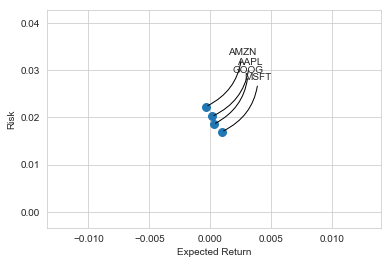

In [66]:
area = np.pi*20 #to define area of circles of scatter plot

plt.scatter(rets.mean(), rets.std(), s=area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, check out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3', color='black')
    )

C:\Users\parikshitas\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


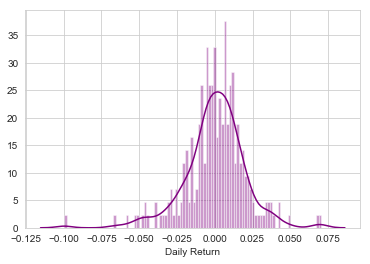

In [68]:
#Analyzing value of risk using 2 methods

#method 1 - bootstrap
# calculate quantiles from a histogram of daily returns

sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

In [69]:
rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-10-01,0.006733,0.000679,0.001542,0.010842
2018-10-02,0.008889,-0.016489,0.004016,-0.003979
2018-10-03,0.012168,-0.009410,0.002366,0.000174
2018-10-04,-0.017581,-0.022194,-0.028896,-0.020665
2018-10-05,-0.016229,-0.010354,-0.009279,-0.005852


In [71]:
rets['AAPL'].quantile(0.05) #95% of time time, the worst daily lost would not exceed this value i.e. 3.3%

-0.033264844875757

In [72]:
# Method 2 - Monte Carlo method
# use the geometric Brownian motion (GBM), known as Markov process. Means Stock price follows random walk and is consistent
# with with (at the very least) the weak form of the efficient 
# market hypothesis (EMH): past price information is already incorporated and 
# the next price movement is "conditionally independent" of past price movements.

# This means that the past information on the price of a stock is independent of where the stock price will be in the future, 
# basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

In [73]:
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [74]:
def stock_monte_carlo(start_price, days, mu, sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
        shock[x] = np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [75]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-09-28,1195.410034,1184.500000,1191.869995,1193.469971,1380600,1193.469971
2018-10-01,1209.900024,1190.300049,1199.890015,1195.310059,1357600,1195.310059
2018-10-02,1209.959961,1186.630005,1190.959961,1200.109985,1687900,1200.109985
2018-10-03,1206.410034,1193.829956,1205.000000,1202.949951,1256200,1202.949951
2018-10-04,1197.510010,1155.576050,1195.329956,1168.189941,2209500,1168.189941


Text(0.5, 1.0, 'Monte Carlo Analysis for GOOG')

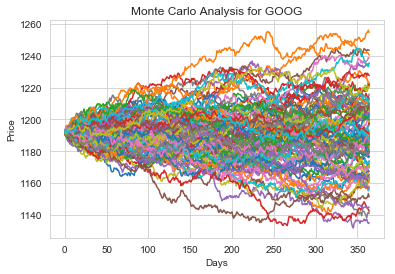

In [76]:
start_price = 1191.869995

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Monte Carlo Analysis for GOOG")
    

In [77]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

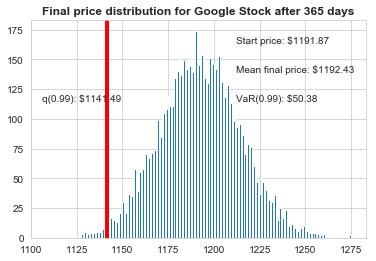

In [79]:
q = np.percentile(simulations,1)

plt.hist(simulations, bins=200)

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');